<img src="https://raw.githubusercontent.com/marcus-valmeida/Projeto-conversao/vn/circuito_exercicio3.png" alt="Circuito Exercício 3" width="300">




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid 
import scipy
#from scipy.misc import derivative



In [5]:

B = np.array([0, 0.1, 0.6,  0.7,  0.75, 0.8,  0.85, 0.96, 1.02, 1.05, 1.08, 1.11, 1.13, 1.15, 1.19, 1.2 ])
H = np.array([-50200, -50000, -49000, -48000, -47000, -46000, -45000, -40000, -35000,-30000, -25000, -20000, -15000, -10000, -5000, 0])

# Dados "lineares" 
B_linear = np.array([0.0, 1.2])
H_linear = np.array([-50200, 0.0])


g0 = 1*1e-3
u0 = np.pi*4*1e-7
W = 4*1e-2
D = 3.5*1e-2
d = 8*1e-3
N1 = 1000
U0 = 4*np.pi*1e-7

Area = W*D # Area do imã = Area do entreferro(x) = Area do entreferro(g0)

num_pontos = 200

#para o caso linear
Ur_linear = (B_linear[0]- B_linear[1])/(H_linear[0]-H_linear[1])


#para o caso real




### Considere inicialmente que não há corrente na bobina.
### Apresente um gráfico para a força magnética que surge no elemento
móvel nas condições a seguir:   
•Considerando uma aproximação linear da forma:  
$$
B_{\mathrm{m}} = \mu_{\mathrm{R}} (H_{\mathrm{m}} - H_{\mathrm{c}}^{\prime})
$$
•Considerando a curva BxH fornecida para o imã.


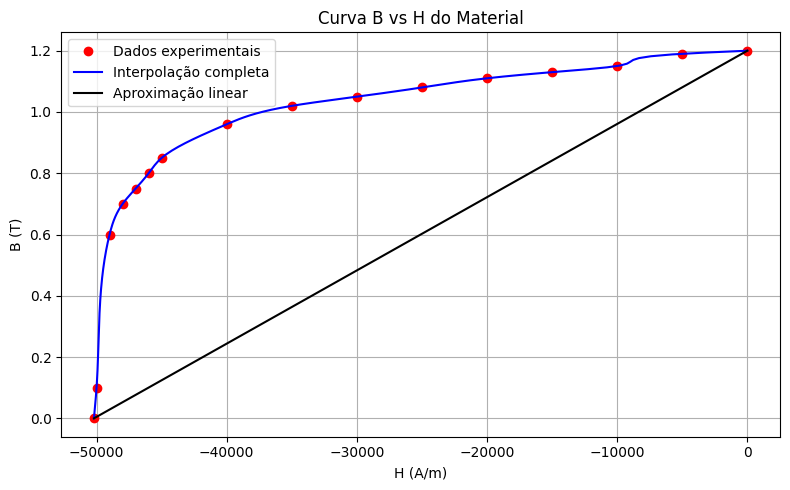

In [6]:
# Interpolação cúbica (ordem crescente de B)
f_real = CubicSpline(B, H, bc_type='natural')
f_linear = CubicSpline(B_linear, H_linear, bc_type='natural')

# Geração de pontos para interpolação
B_a = np.linspace(min(B), max(B), num_pontos)
H_a = f_real(B_a)
H_linear_a = f_linear(B_a)

# Plotagem
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(H, B, 'ro', label='Dados experimentais')
ax.plot(H_a, B_a, 'b-', label='Interpolação completa')
ax.plot(H_linear_a, B_a, 'k-', label='Aproximação linear')

ax.set_title('Curva B vs H do Material')
ax.set_xlabel('H (A/m)')
ax.set_ylabel('B (T)')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


### gráfico para a força magnética

In [ ]:
def Coenergia_forca(Interpolacao_H_B, Nf):
    # variação de x
    x = np.linspace(0, 0.02, num_pontos)# 20 mm em metros
    # variação de Bm
    Bm = np.linspace(0, 1.2, num_pontos)
    # Corrente ficticia -> Inicia um vetor com todos os valores nulos
    If = np.zeros(num_pontos)
  # Fluxo concatenado
    fluxo_concatenado = np.zeros(num_pontos)
    Coenergia = np.zeros(num_pontos)

    #caso onde não calculamos por bobina ficticia
    CoenergiaN1000 = np.zeros(num_pontos)

  
    for j in range(len(x)-1):
      for b in range(len(Bm)):

        #If = (Hi*d + Bm*[x + g0]/U0) /Nf
        If[b] = ((Interpolacao_H_B(Bm[b])*d) + ((Bm[b]*(x[j]+g0)/U0)))/Nf

        # λ =  Nf * Bm * Area_do_imã
        fluxo_concatenado[b] =  Nf*Bm[b]*Area

        # Interpolação de λ , Bm, If
      interpolacao_fluxo_concatenado_If = CubicSpline(If,fluxo_concatenado)
      interpolacao_If_Bm = CubicSpline(Bm,If)

      #parte inferior da integral, ponto onde λ = 0
      If_0 = interpolacao_If_Bm(0)
      #limite de integração do λ
      lim_int_fluxo_concatenado = np.linspace(If_0, 0, num_pontos)
      #valores para coenergia
      interpol_fluxo_concatenado = interpolacao_fluxo_concatenado_If(lim_int_fluxo_concatenado)
      #valores para coenergia
      Coenergia[j] = trapezoid(interpol_fluxo_concatenado,lim_int_fluxo_concatenado) 

      
      Bop_normal = 1.08
      Hop_normal = -31.14*1e+3
      xop_normal = 0.5*1e-3
      #valor da corrente quando está em operação normal
      Iop_normal =   ((-Hop_normal*d) + Bop_normal*((xop_normal + g0)/U0))/Nf
      
      Iint_Nf_1000 =np.linspace(If_0,Iop_normal,num_pontos)
      Fluxo_concat_Interpolado_Nf_1000 = interpolacao_fluxo_concatenado_If(Iint_Nf_1000)
      CoenergiaN1000[j] = trapezoid(Fluxo_concat_Interpolado_Nf_1000,Iint_Nf_1000)

    #caso de operação normal  
    if(Nf == 1000):
      Forca = np.gradient(CoenergiaN1000[:len(x)-1], x[:len(x)-1])
      return Forca, CoenergiaN1000[:len(CoenergiaN1000)-1],(x[:len(x)-1])

    #caso da bobina ficticia
    else:
      Forca = np.gradient(Coenergia[:len(x)-1], x[:len(x)-1])
      return Forca, Coenergia[:len(Coenergia)-1],(x[:len(x)-1])


   



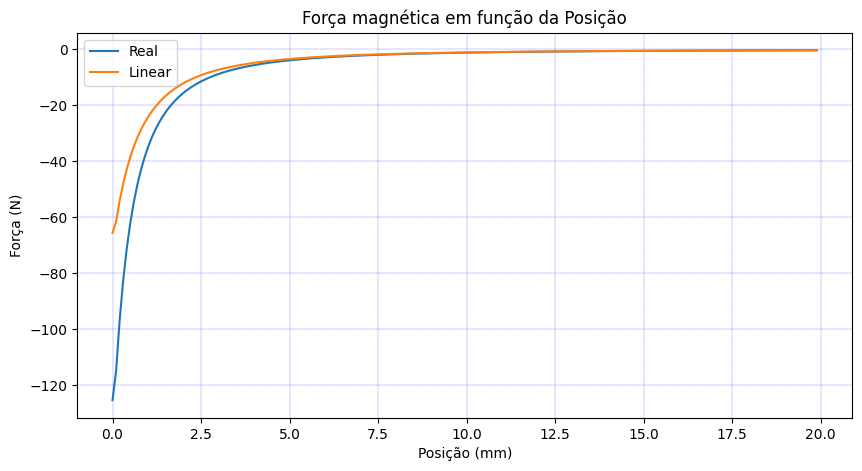

In [ ]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao = Coenergia_forca(f_real, 1)
Forca_linear, Co_energia_linear, posicao = Coenergia_forca(f_linear, 1)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*1000, Forca_real, label="Real")    # x em mm
plt.plot(posicao*1000, Forca_linear, label="Linear")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.2, color='blue')
plt.show()



### Considere agora a existência de corrente na bobina

• Para um elemento móvel na posição **x = 0,5 mm**, apresente um gráfico da densidade de fluxo (**B**) no entreferro em função da corrente  
  aplicada na bobina;

• Considere que é aplicada na bobina uma corrente constante tal que, para o corpo na posição x= 0,5mm, o sistema esteja no ponto de
operação normal indicado pelo fabricante do imã. Nessas condições, apresente um gráfico para a força magnética em função da posição x

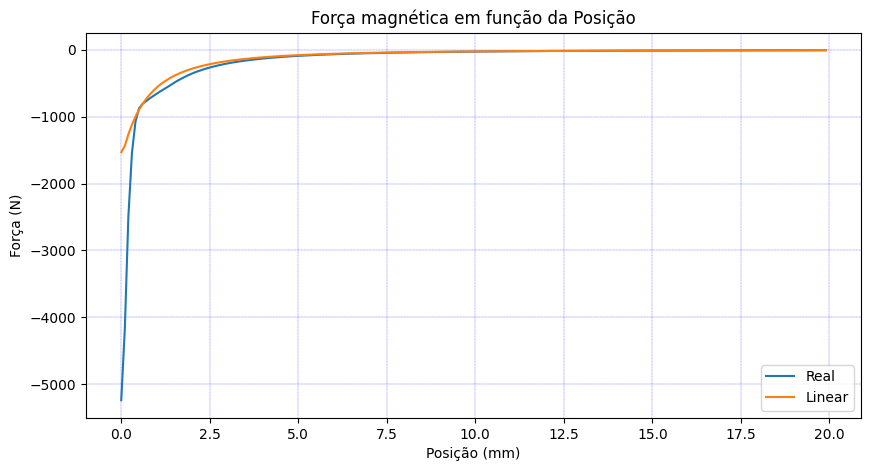

In [ ]:
# ----- Cálculo -----
Forca_real, Co_energia_real, posicao = Coenergia_forca(f_real, 1000)
Forca_linear, Co_energia_linear, posicao = Coenergia_forca(f_linear, 1000)

# ----- Plot -----
plt.figure(figsize=[10,5])
plt.plot(posicao*1000, Forca_real, label="Real")    # x em mm
plt.plot(posicao*1000, Forca_linear, label="Linear")
plt.xlabel("Posição (mm)")
plt.ylabel("Força (N)")
plt.title("Força magnética em função da Posição")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.2, color='blue')
plt.show()
